In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
survey_data = pd.read_excel('DACC_Hackathon_Media_Habit_Survey.xlsx', sheet_name ='Raw Responses')

In [7]:
survey_data.head()

ID  v_16  v_17  v_18  v_19  ...  v_309  v_310  v_311  v_312  v_333
0  101011101     1   3.0   4.0   1.0  ...      0      0      0    NaN    1.0
1  105017101     1   3.0   3.0   1.0  ...      0      1      0    NaN    0.0
2  105021106     1   7.0   7.0   1.0  ...      0      1      0    NaN    0.0
3  105044101     1   7.0   7.0   4.0  ...      0      1      0    NaN    0.0
4  105046101     3   3.0   3.0   1.0  ...      0      1      0    NaN    0.0

[5 rows x 261 columns]

## **Q4a. Do you have a mobile phone personally?**

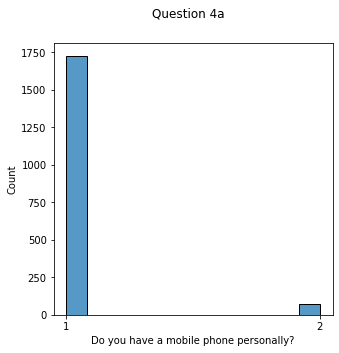

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), sharey=True)
fig.suptitle('Question 4a')

sns.histplot(ax=ax,data = survey_data, x='v_210');
ax.set_xlabel('Do you have a mobile phone personally?')
ax.set_xticks([1,2])

plt.show()

## **Q4b. What type of phone you are using?**

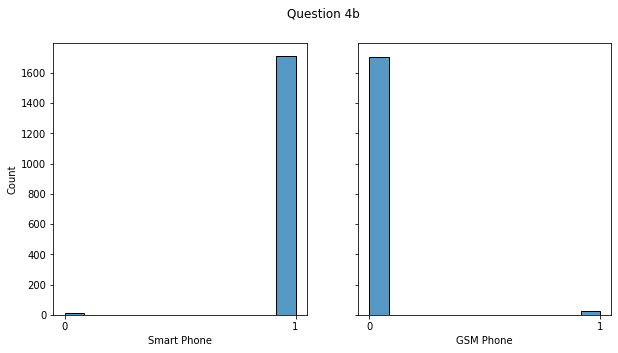

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Question 4b')

# QUOTED = YES; UNQUOTED = NO

sns.histplot(ax=ax[0], data=survey_data, x='v_211');
ax[0].set_xlabel('Smart Phone')
ax[0].set_xticks([0,1])

sns.histplot(ax=ax[1], data=survey_data, x='v_212');
ax[1].set_xlabel('GSM Phone')
ax[1].set_xticks([0,1])

plt.show()

##**Q4c. Do you have internet service (data plan) on your mobile phone?**

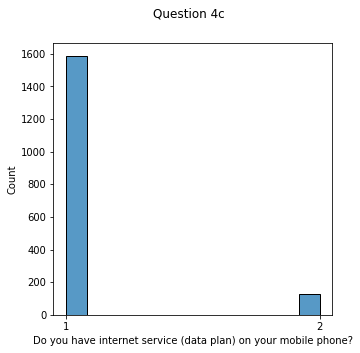

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), sharey=True)
fig.suptitle('Question 4c')

sns.histplot(ax=ax,data = survey_data, x='v_216');
ax.set_xlabel('Do you have internet service (data plan) on your mobile phone?')
ax.set_xticks([1,2])

plt.show()

##**Q4d. Which data plan provider do you subscribe?**

In [11]:
survey_data.columns.get_loc('v_16')

1

In [12]:
survey_data.columns

Index(['ID', 'v_16', 'v_17', 'v_18', 'v_19', 'v_20', 'v_21', 'v_22', 'v_23',
       'v_24',
       ...
       'v_304', 'v_305', 'v_306', 'v_307', 'v_308', 'v_309', 'v_310', 'v_311',
       'v_312', 'v_333'],
      dtype='object', length=261)

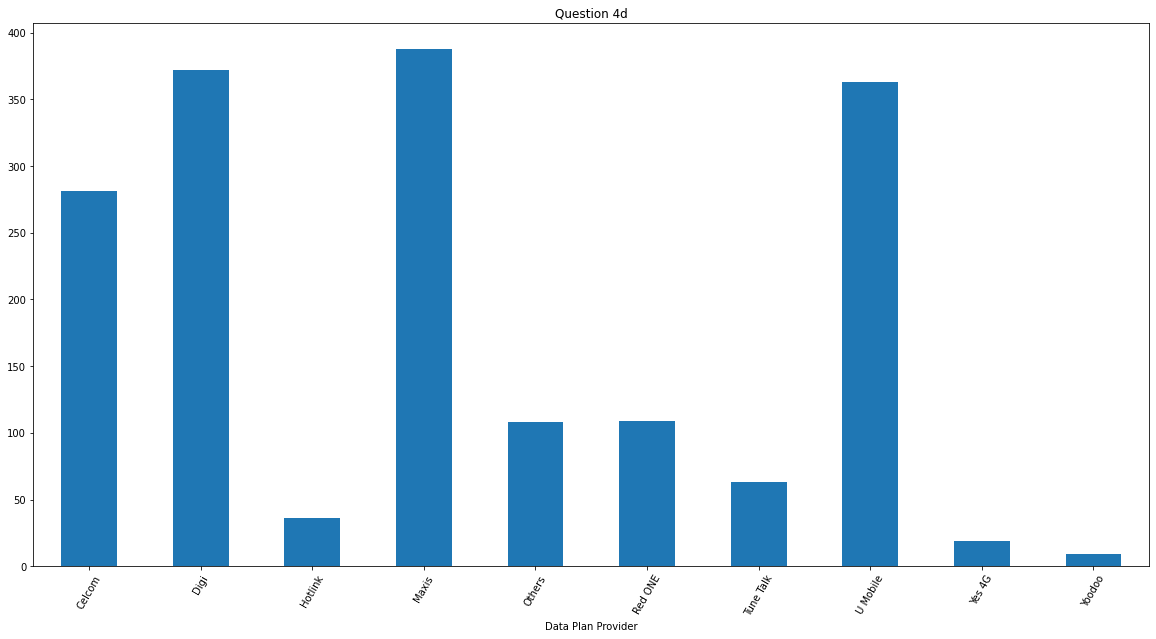

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

providers = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[178:188])
providers.replace(survey_data.columns[178:188], ['Maxis', 'Celcom', 'Digi', 'U Mobile', 'Hotlink', 'Yes 4G', 'Tune Talk', 'Red ONE', 'Yoodoo', 'Others'], inplace=True)
providers.dropna(inplace=True)
providers.drop(columns=['ID'], inplace=True)

providers.groupby(['variable']).sum().unstack().plot(kind='bar', ax=ax);
ax.set_title('Question 4d')
ax.set_xlabel('Data Plan Provider')
ax.set_xticklabels(['Celcom', 'Digi', 'Hotlink', 'Maxis', 'Others', 'Red ONE', 'Tune Talk', 'U Mobile', 'Yes 4G', 'Yoodoo'])
plt.xticks(rotation=60);